In [ ]:
!pip install pandas openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.io

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Path to the .mat file on your Google Drive
mat_file_path = '/content/gdrive/MyDrive/ProjectDATA/Y_PCA_4.mat'

# Load the .mat file
X = scipy.io.loadmat(mat_file_path)
X = pd.DataFrame(X['Y_PCA'].T)
X = X.iloc[:, 4:]
print(X.shape)

MessageError: ignored

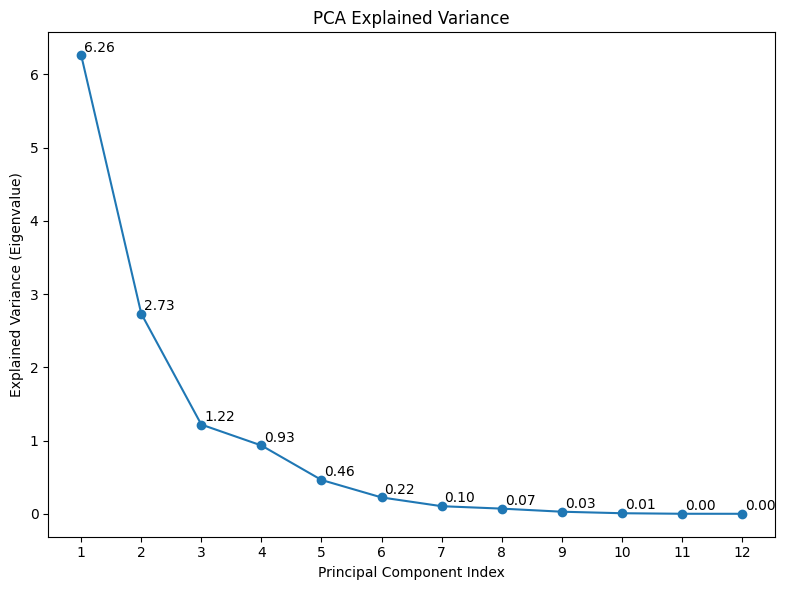

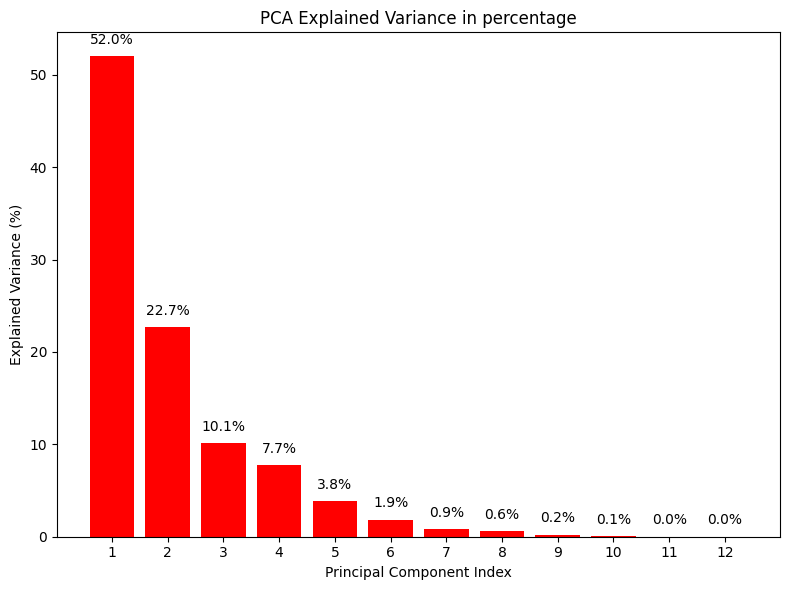

In [ ]:
def PCA(X):
  # Z-score the features
  scaler = StandardScaler()
  scaler.fit(X)
  X0 = scaler.transform(X)
  # cov matrix
  S = 1/(X.shape[0]-1) * (X0.T @ X0)
  l, A = np.linalg.eig(S)
  index_sort = np.argsort(-l)
  l_sort = l[index_sort]
  A_sort = A[:, index_sort]
  Z = X0 @ A_sort
  return A_sort, Z, l_sort

A_sort, Z, l_sort = PCA(X)

# Plot with original explained variance values
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(np.arange(1, X.shape[1] + 1), l_sort, marker='o', linestyle='-', markersize=6)
ax1.set_title('PCA Explained Variance')
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('Explained Variance (Eigenvalue)')

# Add labels for explained variance values
for i, var in enumerate(l_sort):
    ax1.text(i + 1.05, var + 0.01, f'{var:.2f}', ha='left', va='bottom')

# Customize plot layout
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.tight_layout()

# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/ExplainedVariance_Line_dpi300.png', dpi=300)

# Display the plot
plt.show()

# Plot with explained variance percentage as bar plot
fig, ax2 = plt.subplots(figsize=(8, 6))
explained_var_percentage = l_sort / np.sum(l_sort) * 100
ax2.bar(np.arange(1, X.shape[1] + 1), explained_var_percentage, color='red')
ax2.set_title('PCA Explained Variance in percentage')
ax2.set_xlabel('Principal Component Index')
ax2.set_ylabel('Explained Variance (%)')

# Add labels for explained variance percentage
for i, var in enumerate(explained_var_percentage):
    ax2.text(i + 1, var + 1, f'{var:.1f}%', ha='center', va='bottom', color='black')

# Customize plot layout
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.tight_layout()

# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/ExplainedVariance_Bar_dpi300.png', dpi=300)

# Display the plot
plt.show()


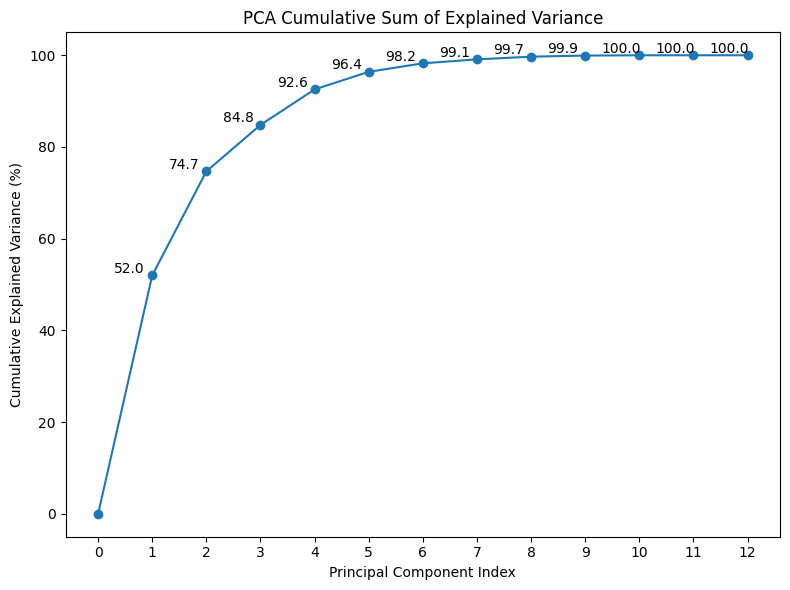

In [ ]:
from sklearn.decomposition import PCA
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X0 = scaler.transform(X)

# The PCA model
pca = PCA(n_components=12) # estimate only 2 PCs
pca.fit(X0)
# X_new = pca.fit_transform(X0) # project the original data into the PCA space
l_cumsum = np.cumsum(pca.explained_variance_ratio_)
sum_l_sklearn = np.insert(l_cumsum, 0, 0)*100

# pca = PCA()
# pca.fit(X)
# l_sklearn = pca.explained_variance_ratio_
# sum_l_sklearn = np.cumsum(l_sklearn)
# sum_l_sklearn = np.insert(sum_l_sklearn, 0, 0)*100
# print(sum_l_sklearn)

# Plot with cumulative sum of explained variance
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(np.arange(0, X.shape[1] + 1), sum_l_sklearn, marker='o', linestyle='-', markersize=6)
ax1.set_title('PCA Cumulative Sum of Explained Variance')
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('Cumulative Explained Variance (%)')

# Add labels for explained variance values
for i, var in enumerate(sum_l_sklearn):
  if i >= 1:
    ax1.text(i - 0.7, var - 0.1, f'{var:.1f}', ha='left', va='bottom')

# Customize plot layout
plt.xticks(np.arange(0, X.shape[1] + 1))
plt.tight_layout()

# Save the plot
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/CumExplainedVariance_Line_dpi300.png', dpi=300)

# Display the plot
plt.show()


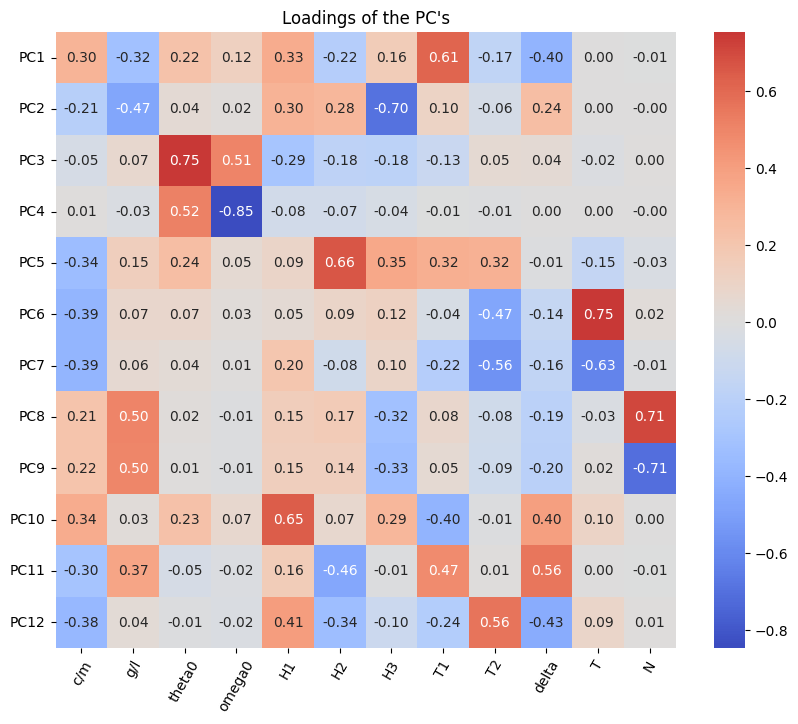

In [ ]:
import seaborn as sns
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X0 = scaler.transform(X)

# The PCA model
pca = PCA(n_components=12) # estimate only 2 PCs
pca.fit(X0)

# Features
features = ['c/m', 'g/l', 'theta0', 'omega0', 'H1', 'H2', 'H3', 'T1', 'T2', 'delta', 'T', 'N']
# features = ['H1', 'H2', 'H3', 'T1', 'T2', 'delta', 'T', 'N']


# Get the loadings
loadings = pca.components_

# Plot the loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.xticks(np.arange(0.5, X.shape[1] + 0.5), features, rotation=60)
plt.yticks(np.arange(len(pca.components_)) + 0.5, ['PC{}'.format(i+1) for i in range(len(pca.components_))], rotation=0)
# plt.xlabel('Features')
# plt.ylabel('Principal Components')
plt.title('Loadings of the PC\'s')
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/Loadings_dpi300.png', dpi=300)
plt.show()


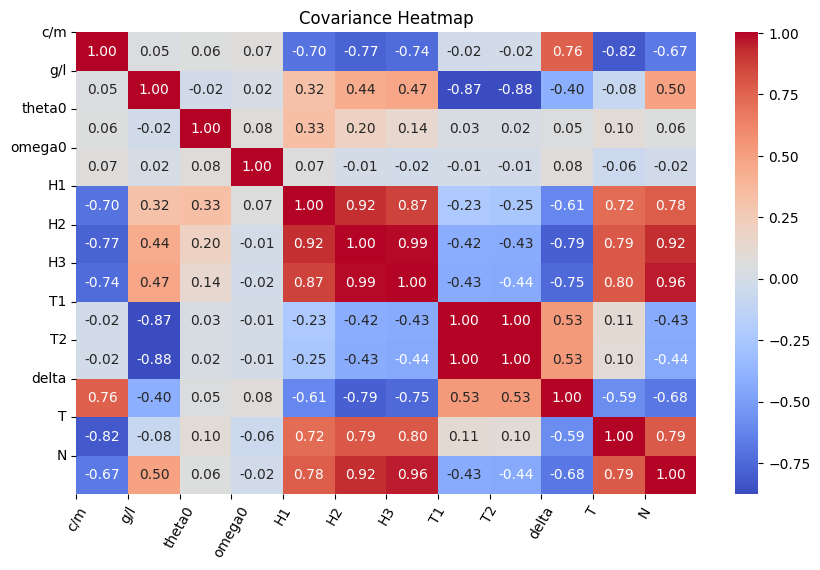

In [ ]:
import seaborn as sns
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X0 = scaler.transform(X)

# The PCA model
pca = PCA(n_components=12) # estimate only 2 PCs
pca.fit(X0)
S = 1/(X.shape[0]-1) * (X0.T @ X0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(S, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Heatmap")
plt.xticks(np.arange(0, S.shape[1], step=1), features, rotation=60)
plt.yticks(np.arange(0, S.shape[1], step=1), features, rotation=0)
plt.show()

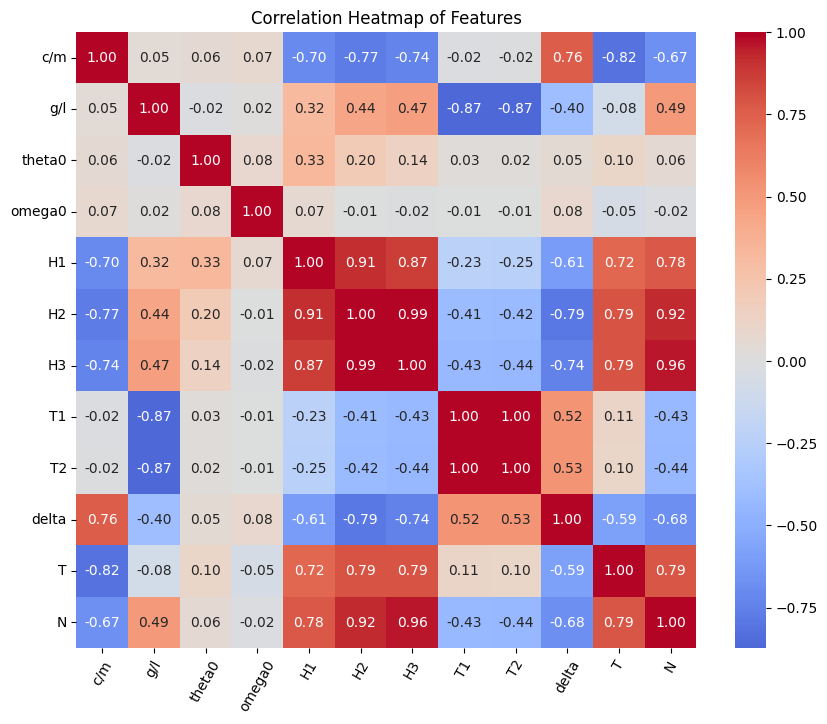

In [ ]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)  # Add center=0 to set the center of the color map at 0
plt.title("Correlation Heatmap of Features")
plt.xticks(np.arange(0.5, X.shape[1] + 0.5), features, rotation=60)  # Adjust xticks to be in the middle of the columns
plt.yticks(np.arange(0.5, X.shape[1] + 0.5), features, rotation=0)  # Adjust yticks to be in the middle of the rows
plt.savefig('/content/gdrive/MyDrive/ProjectDATA/CorrHeatmap_dpi300.png', dpi=300)
plt.show()
